In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
df = pd.read_csv('Data/cust_seg.csv')
df.head()

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [2]:
# Deleting empty first column and indexing cust id
df = df.drop(columns = "Unnamed: 0")
df = df.set_index("Customer Id")
df.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Customer Id,,,,,,,,
1,41,2,6,19,0.124,1.073,0.0,6.3
2,47,1,26,100,4.582,8.218,0.0,12.8
3,33,2,10,57,6.111,5.802,1.0,20.9
4,29,2,4,19,0.681,0.516,0.0,6.3
5,47,1,31,253,9.308,8.908,0.0,7.2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 850 entries, 1 to 850
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              850 non-null    int64  
 1   Edu              850 non-null    int64  
 2   Years Employed   850 non-null    int64  
 3   Income           850 non-null    int64  
 4   Card Debt        850 non-null    float64
 5   Other Debt       850 non-null    float64
 6   Defaulted        700 non-null    float64
 7   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 59.8 KB


In [4]:
# Defaulted has 150 nulls. Checking values
df['Defaulted'].value_counts()

0.0    517
1.0    183
Name: Defaulted, dtype: int64

In [5]:
# Giving most common value
df['Defaulted'] = df['Defaulted'].fillna(value=0.0)
df['Defaulted'].value_counts()

0.0    667
1.0    183
Name: Defaulted, dtype: int64

In [6]:
df.describe()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
count,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000
mean,35.029412,1.710588,8.565882,46.675294,1.576820,3.078773,0.215294,10.171647
std,8.041432,0.927784,6.777884,38.543054,2.125843,3.398799,0.411268,6.719441
min,20.000000,1.000000,0.000000,13.000000,0.012000,0.046000,0.000000,0.100000
25%,29.000000,1.000000,3.000000,24.000000,0.382500,1.045750,0.000000,5.100000
50%,34.000000,1.000000,7.000000,35.000000,0.885000,2.003000,0.000000,8.700000
75%,41.000000,2.000000,13.000000,55.750000,1.898500,3.903250,0.000000,13.800000
max,56.000000,5.000000,33.000000,446.000000,20.561000,35.197000,1.000000,41.300000


In [7]:
# There doesn't appear anythin too alarming
# Scaling the data
scaler = StandardScaler()
dfs = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
dfs.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0.742915,0.312122,-0.378790,-0.718459,-0.683811,-0.590489,-0.523797,-0.576525
1,1.489490,-0.766349,2.573721,1.384325,1.414474,1.512962,-0.523797,0.391387
2,-0.252518,0.312122,0.211712,0.268032,2.134141,0.801704,1.909138,1.597554
3,-0.750235,0.312122,-0.674041,-0.718459,-0.421643,-0.754467,-0.523797,-0.576525
4,1.489490,-0.766349,3.311849,5.356249,3.638900,1.716094,-0.523797,-0.442507


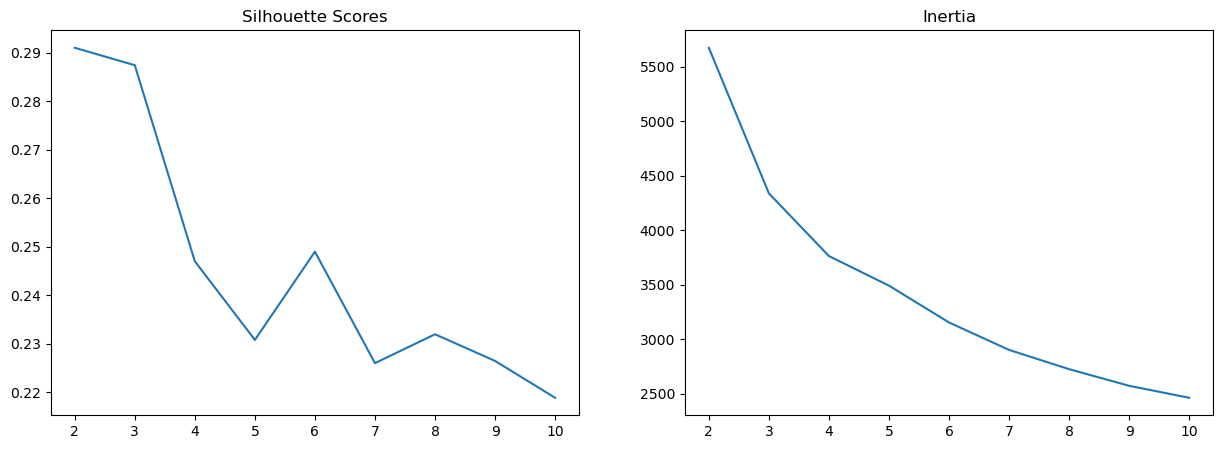

In [8]:
# Iterate over a range of k clusters to find the optimal number of clusters
ks = range(2,11)
sils = []
inertias = []
for k in ks:
  kmeans = KMeans(n_clusters=k, n_init = 'auto', random_state=42)
  kmeans.fit(dfs)
  sils.append(silhouette_score(dfs, kmeans.labels_))
  inertias.append(kmeans.inertia_)
#plot inertias and silhouette scores for each number of clusters.
fig, axes = plt.subplots(1,2, figsize=(15,5))
axes[0].plot(ks, sils)
axes[0].set_title('Silhouette Scores')
axes[0].set_xticks(ks)
axes[1].plot(ks, inertias)
axes[1].set_title('Inertia')
axes[1].set_xticks(ks);

In [9]:
# If we're going by both models, three clusters would appear to fit best
# Refit KMeans with 3 clusters
kmeans = KMeans(n_clusters=3, n_init= 'auto', random_state=42)
kmeans.fit(dfs)
# Adding the clusters as a column in the dataframe
df['cluster'] = kmeans.labels_
df.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,cluster
Customer Id,,,,,,,,,
1,41,2,6,19,0.124,1.073,0.0,6.3,2
2,47,1,26,100,4.582,8.218,0.0,12.8,0
3,33,2,10,57,6.111,5.802,1.0,20.9,1
4,29,2,4,19,0.681,0.516,0.0,6.3,2
5,47,1,31,253,9.308,8.908,0.0,7.2,0


In [10]:
# Grouping by cluster
# Add as_index=False so that the clusters are a column, not the index
clusters = df.groupby('cluster', as_index=False).mean()
clusters

,cluster,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,43.000000,1.931973,17.197279,101.959184,4.220673,7.954483,0.129252,13.915646
1,1,31.891566,1.861446,3.963855,31.789157,1.576675,2.843355,0.987952,13.994578
2,2,33.817505,1.603352,7.625698,36.143389,0.853128,1.816855,0.000000,7.964991


In [11]:
df['cluster'].dtype

dtype('int32')

In [12]:
df['cluster'].value_counts()

2    537
1    166
0    147
Name: cluster, dtype: int64

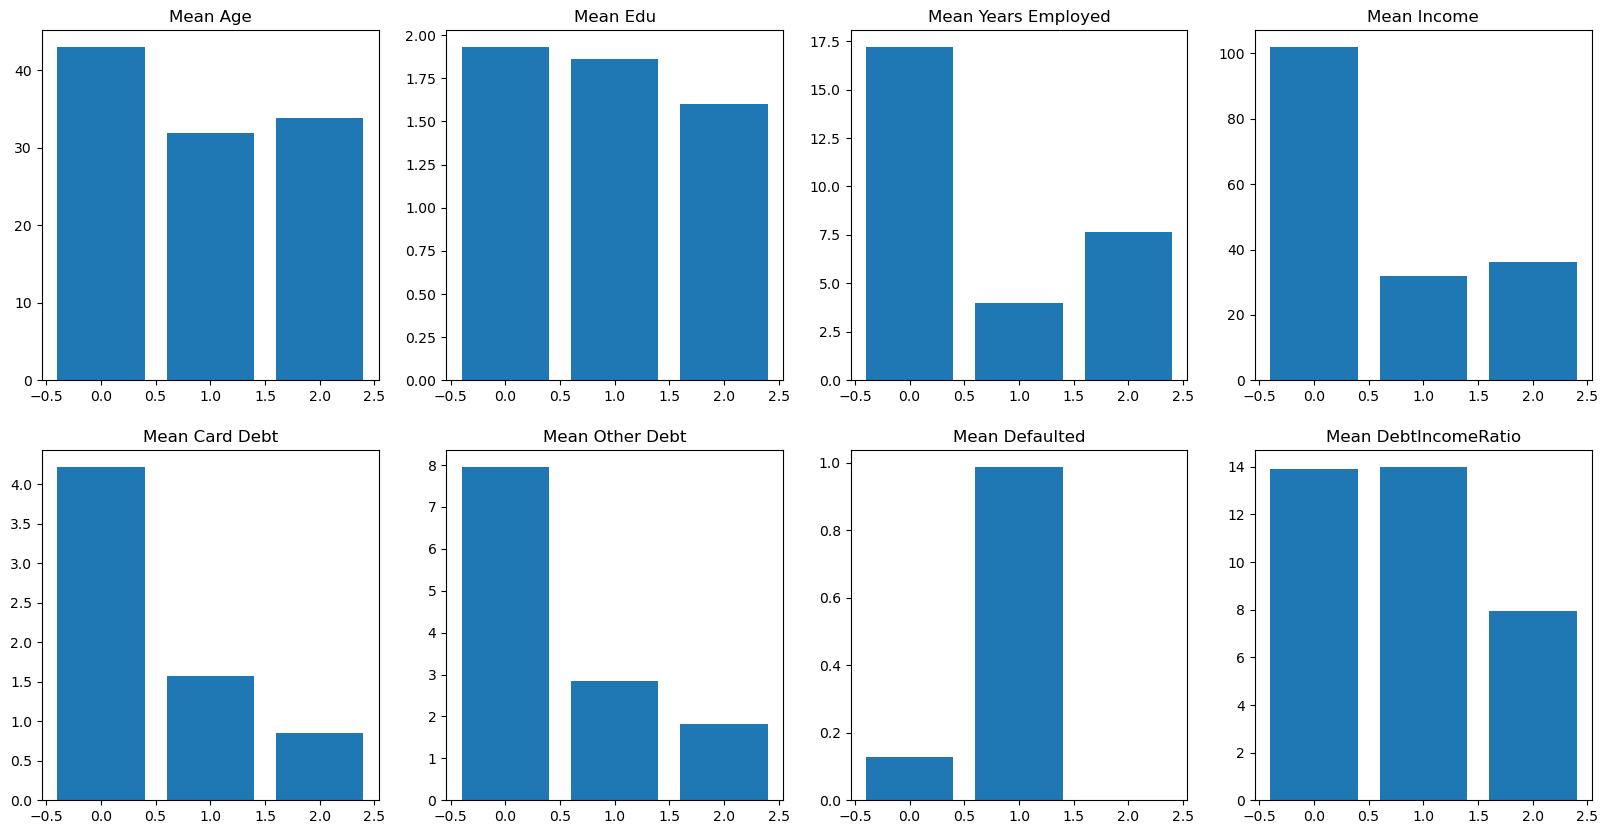

In [13]:
# Visualize means 
fig, axes = plt.subplots(2,4, figsize = (20, 10))
# fig is an array of dimensions 2,4.  axes.ravel() will flatten it to 12,1
axes = axes.ravel()
# Loop over columns and plot each in a separate figure, skip 'cluster' column
for i, col in enumerate(clusters.columns[1:]):
  axes[i].bar(clusters['cluster'], clusters[col])
  axes[i].set_title(f'Mean {col}')

1. Mean Age is a good start to differenciating the clusters. Group 0 is the older customer base, Group 1 the youngest and Group 2 slightly older. Spending habits can vary wildly across generations.
2. Unsurprisingly the older crowd is more educated but the second 'young' group is not far behind. Third group is least educated, the implications of which could be interesting to see.
3. For year employed the first older group has more years on average than the other two combined. Extrapolating from education level, the second group could be college graduates with the first group working right after highschool, explaining the approximate 4-year difference on average between them.
4. Holding our assumptions from before we may expect our 'college' group to have higher average income than the third group but remember the third group has been employed for longer, allowing time for experience and pay raises while the second group is fresh to the workforce and have little bargaining position outside their degree.
5. Interesting that the first group has significantly higher card debt with the second following. Given this is an older age group, many of these customers are probably married with children, meaning many more regular expenses. Our 'college' group we would expect higher expenses from too, living on campus away from families.
6. It's strange the 'other debt' graph almost perfectly matches the 'card debt' graph. High debt in first cluster may be home mortgages and car loans, mixed with a few student loans. Second group, this may be from student loan debt and third group from typical loans.
7. Very revealing that the second group has huge default risk, revealing they have probably the least stable income, which given our assumptions makes sense.
8. We see here the first two groups leveling out almost exactly. Despite having significantly higher debt in both categories, our first group's income is strong enough to balance. Our third group for having modest income levels has minimal debt and no defaulting to speak of, making them appear the most stable/reliable customer base to make credit card payments, even though they would likely return a fraction in gross income compared to our first group.

## Recommendations

- If we're just approaching this from our eight graphs, our first group would be our bread and butter to reach out to with significant card spending. Tailoring a card with family perks and rapid rewards for regular spending could draw in more from this lucerative customer base.
- It's important to know most of the customers in our dataset are in the second group, and a high default rate, while allowing some profit short-term, doesn't bring a good reputation or loyal customer base long-term, to say nothing of moral implications in charging aggressive interest knowing these customers will likely be unable to pay. A better way to court these customers could be a lower income friendly card that keeps 0% APR first year and a more reasonable interest rate for following years.
- For our third group, a single income card that encourages incorporating more spending on it to build FICO scores may work. We could likely afford to charge higher interest as default rates, at least from our graph, appear nonexistent.
- It's unfortunate we had 150 missing values for defaulting and had to "guess" they weren't defaulted yet. They could illuminate more. 